<h4><i> Imports and Stuff </i></h4>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
invoices_df = pd.read_csv('fct_invoice.csv')
customers_df = pd.read_json('dim_customer.json')

In [45]:
print(invoices_df.category)

0               Clothing
1                  Shoes
2               Clothing
3                  Shoes
4                  Books
              ...       
99452           Souvenir
99453    Food & Beverage
99454    Food & Beverage
99455         Technology
99456           Souvenir
Name: category, Length: 99457, dtype: object


<h3>Easy</h3>

In [46]:
#1. How many unique customers are in the dataset?
unique_customers = invoices_df['customer_id'].nunique()
print("# Unique Customers:", unique_customers)

# Unique Customers: 5191


In [57]:
unique_categories = invoices_df['category'].nunique()
categories = invoices_df['category'].unique()
print("Number of unique categories:", unique_categories)
print("Categories:", categories)

Number of unique categories: 8
Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [48]:
#3. Which payment method is the most popular? How many times was it used?
popular_payment = invoices_df['payment_method'].value_counts().idxmax()
payment_count = invoices_df['payment_method'].value_counts().max()
print(f"Top Popular Payment Method: {popular_payment}")
print(f"# of Times Utilized: {payment_count}")

Top Popular Payment Method: Cash
# of Times Utilized: 44447


<h3>Medium</h3>

In [49]:
#1. What are the three most popular categories, by total sales?
popular_categories = invoices_df.groupby('category')['quantity'].sum().nlargest(3)
print("Three most popular categories, by total sales:")
print(popular_categories)

Three most popular categories, by total sales:
category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64


In [50]:
#2. What are the total sales attributed to customers over the age of 45?
customers_over_45 = customers_df[customers_df['age'] > 45]
merged_df = pd.merge(customers_over_45, invoices_df, left_on='id', right_on='customer_id')
total_purchases_over_45 = merged_df['quantity'].sum()
total_sales_over_45 = merged_df['price'].sum()
print("Total sales attributed to customers over the age of 45:", total_sales_over_45)
print("Total purchases attributed to customer over the age of 45:", total_purchases_over_45)



Total sales attributed to customers over the age of 45: 22370553.27
Total purchases attributed to customer over the age of 45: 97629


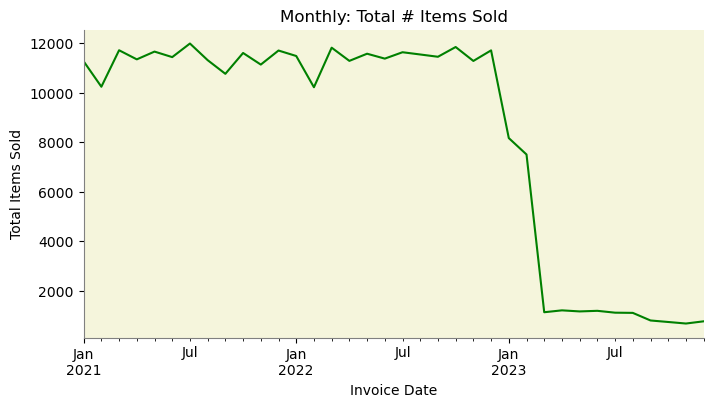

In [53]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import pandas as pd
import matplotlib.pyplot as plt

invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'])
monthly_data = invoices_df.set_index('invoice_date').resample('M')['quantity'].sum()

plt.figure(figsize=(8, 4))
monthly_data.plot(kind='line', color='green')  

plt.xlabel('Invoice Date')
plt.ylabel('Total Items Sold')
plt.title('Monthly: Total # Items Sold')

plt.gca().set_facecolor('beige')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

plt.show()

In [52]:
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
customers_df['decade_age_range'] = pd.cut(customers_df['age'], bins=range(0, 101, 10), labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
merged_df = pd.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
pivot_table = merged_df.pivot_table(values='quantity', index='category', columns='decade_age_range', aggfunc='sum', fill_value=0)
print(pivot_table)

decade_age_range  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  \
category                                                                        
Books               0    351   1443   1522   1471   1438   1354   1031    409   
Clothing            0   2722   9233  10391   9996   9802   9080   7154   3401   
Cosmetics           0   1178   3999   4865   4382   4214   3990   2884   1470   
Food & Beverage     0   1067   3929   4651   4443   4106   3968   2894   1328   
Shoes               0    638   2810   3181   3035   2832   2471   2134    951   
Souvenir            0    458   1267   1487   1488   1352   1215    907    475   
Technology          0    438   1313   1607   1518   1222   1386    964    400   
Toys                0    748   2841   3259   2891   2747   2593   2179    983   

decade_age_range  90-99  
category                 
Books                 0  
Clothing              0  
Cosmetics             0  
Food & Beverage       0  
Shoes                 0  
Souveni